### Baseline Model

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pandas as pd
import os
import dtale
import numpy as np

Load in dataset

In [58]:
project_dir = os.path.dirname(os.path.abspath(''))
df = pd.read_json(os.path.join(project_dir, 'model_prepped_dataset.json'))
dtale.show(df).open_browser()

Assign dataset to X matrix and y vector, then split into training set and test set.

In [59]:
X = df.loc[:, df.columns != 'Outcome']
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(X))

83509
14738
98247


Scale X by standardising it. Use the mean and standard deviation of the training set to standardise the test set.

In [61]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#### Option 1) Logistic Regression

Train model.

In [77]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression()

Test the accuracy of the model by checking against the test set. This consists of calculating the MSE and accuracy of the predicted classification.

0.49748948296919526

In [84]:
y_pred_log = lgr.predict(X_test)
mse_log = mean_squared_error(y_test, y_pred_log)
y_delta_log = y_pred_log - y_test
accu_log = accuracy_score(y_test, y_pred_log) * 100
print(f'Logistic Regression Model\nAccuracy: {accu_log:.2f}%.\nMSE: {mse_log:.2f}')

Logistic Regression Model
Accuracy: 49.75%.
MSE: 1.16


#### Option 2) Linear Regression

Train model.

In [64]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Test the accuracy of the model by checking against the test set. This consists of calculating the MSE and accuracy of the predicted outcome.

In [85]:
y_pred_lin = np.rint(lr.predict(X_test))
mse_lin = mean_squared_error(y_test, y_pred_lin)
y_delta_lin = y_pred_lin - y_test
accu_lin = accuracy_score(y_test, y_pred_lin) * 100
print(f'Linear Regression Model\nAccuracy: {accu_lin:.2f}%.\nMSE: {mse_lin:.2f}')

Linear Regression Model
Accuracy: 34.48%.
MSE: 0.69


#### Conclusion
Baseline model is simple logistic regression with 49.75% accuracy.

Look at feature heatmap to understand correlations better.

<AxesSubplot:>

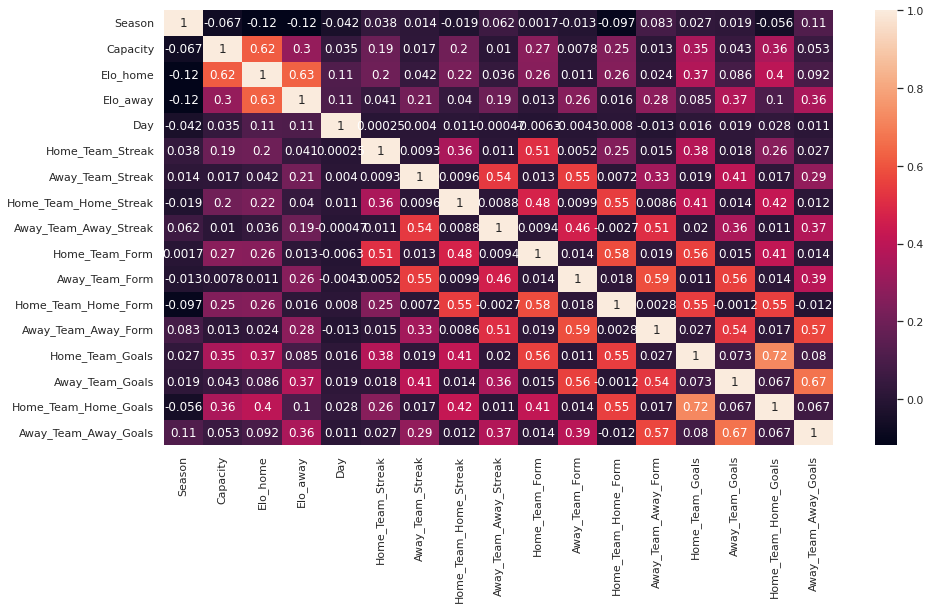

In [66]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(X.corr(), annot=True)